In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
cd ..

/Share/home/shibinbin/projects/emaize


In [3]:
import h5py

In [4]:
with h5py.File('output/random_select/10000', 'r') as f:
    X = f['/0/X'][:]

In [6]:
X_normed = (X - X.mean(axis=1)[:, np.newaxis])/X.std(axis=1)[:, np.newaxis]

In [13]:
XTX = np.dot(X_normed, X_normed.T)
XTX[np.arange(XTX.shape[0]), np.arange(XTX.shape[0])] = 0

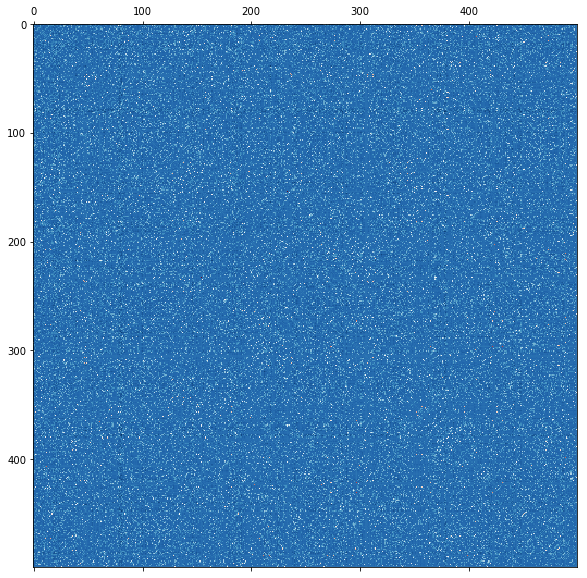

In [18]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.matshow(XTX[:500, :500], cmap=cm.RdBu_r)

In [31]:
r = 12
A = np.random.normal(size=(r, X.shape[1]))
X_proj = np.dot(A, X_normed.T)
X_bits = (X_proj >= 0).astype('int16')
X_hash = np.dot(2**np.arange(12)[np.newaxis, :], X_bits).flatten()
unique_hash, counts = np.unique(X_hash, return_counts=True)
unique_hash_sorted = unique_hash[np.argsort(-counts)]
counts_sorted = counts[np.argsort(-counts)]

In [30]:
np.sum(X_hash == 2102)

21

In [32]:
ind_high_freq = []
for i in range(100):
    ind_high_freq.append(np.nonzero(X_hash == unique_hash_sorted[i])[0])
ind_high_freq = np.concatenate(ind_high_freq)

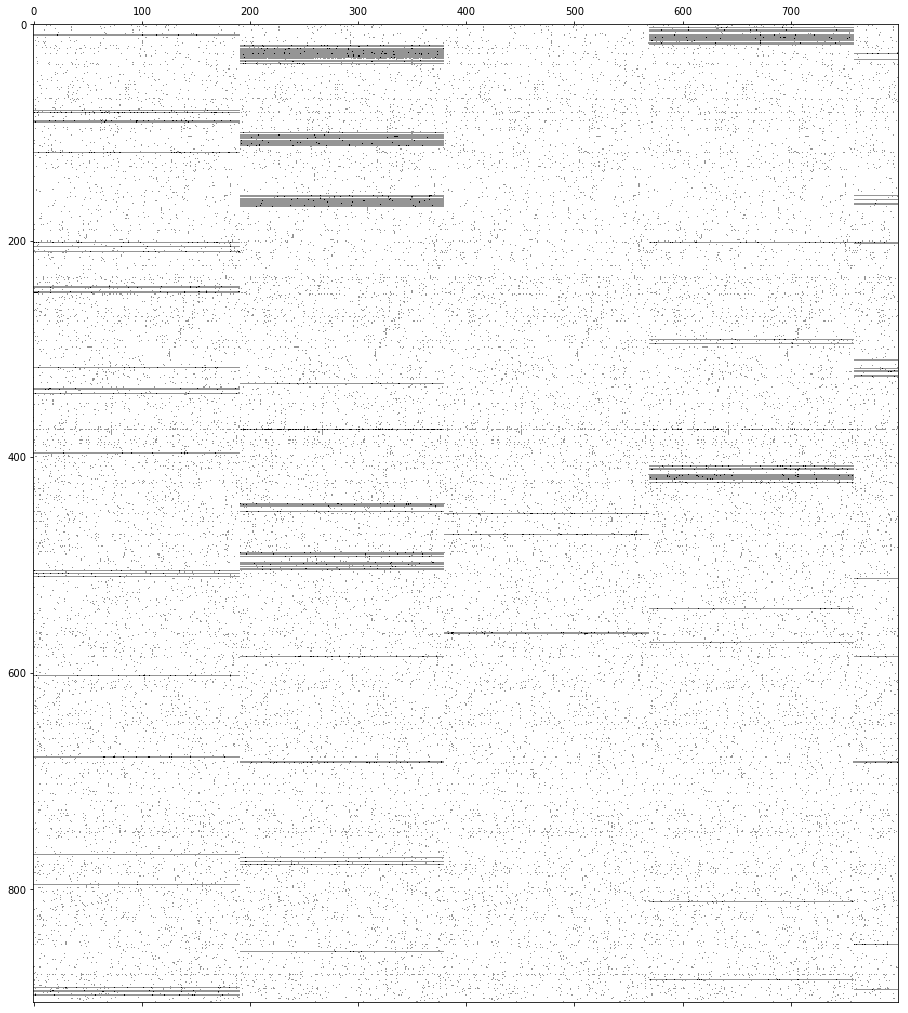

In [50]:
fig, ax = plt.subplots(figsize=(18, 18))
ax.matshow(X[ind_high_freq, :800], cmap=cm.Greys)

In [ ]:
XTX